## 🛡️ FDA Import Food Refusal Audit (2001–2025)  
**Author:** Md Shafin Ahamed  
**Scope:** Human Food Consumables  
**Data Source:** FDA Import Refusal Reports (Processed 205k+ records from 500k raw entries)  

### Executive Summary  
This project audits 25 years of FDA import refusal data to identify systemic risks in the global food supply chain. By analyzing over 200,000 refusal records across 188 countries, this study isolates:  
1.  **Temporal Violations:** Shifts in enforcement intensity, including the 2020 pandemic dip.  
2.  **Geographic Risk:** Identification of high-risk trading partners, particularly in Asia.  
3.  **Product Vulnerability:** The disparity between high-scrutiny sectors (Seafood) and lower-refusal sectors (Meat).  
4.  **Root Cause:** The specific legal charges (Filth, Labeling, Additives) driving refusals.  

In [4]:
#Importing tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#inserting file
df = pd.read_csv(
    r"D:\data_files\FDA_Food_Safety_Project\food_refusals_clean.csv", 
    encoding = 'ISO-8859-1'
)
#Adding necessary colums
df['Refused Date'] = pd.to_datetime(df['Refused Date'], errors='coerce')
df['Year'] = df['Refused Date'].dt.year
df['Country'] = df['Firm Address'].str.split(',').str[-1].str.strip()

#NLP, creating a list 
#Mapping dictionary 
product_category_map = {
    2: 'Whole Grains', 3: 'Bakery Prods', 4: 'Macaroni/Noodle', 5: 'Cereal Prep',
    7: 'Snack Foods', 9: 'Milk/Dairy', 12: 'Cheese', 13: 'Ice Cream',
    14: 'Chocolate', 15: 'Eggs', 16: 'Fishery/Seafood', 17: 'Meat',
    18: 'Vegetable Oils', 20: 'Fruit', 21: 'Fruit/Juices', 22: 'Nuts/Seeds',
    23: 'Vegetables', 24: 'Vegetables', 25: 'Veg Products', 26: 'Spices/Flavors',
    27: 'Dressings', 28: 'Spices', 29: 'Soft Drinks', 30: 'Beverage Bases',
    31: 'Coffee/Tea', 32: 'Alcohol', 33: 'Candy', 34: 'Chocolate',
    35: 'Gelatin', 36: 'Edible Oils', 37: 'Multiple Foods', 38: 'Soups',
    39: 'Prepared Salad', 40: 'Baby Food', 41: 'Dietary', 42: 'Edible Insects'
}

df['Product_category'] = df['Product_code'].map(product_category_map).fillna('Unknown/Others')

### 1. Temporal Trend Analysis (2011-2025)  
**Objective:** To track the volume of refusals over the last 15 years and identify periods of heightened regulatory scrutiny.  

**Key Insights:**  
* **Seafood Volatility:** Fishery/Seafood refusals peaked early (2011-2012) with over 2,800 incidents but have shown volatility since.  
* **The "COVID Gap":** A noticeable drop ("plummet") in refusals occurred in 2020, likely due to reduced border inspections during the pandemic.  
* **Emerging Risks:** Snack foods surged to the top spot in 2022 & 2025 (approx. 1,700 refusals), while Fruit/Juice products show a slight but steady growth trend.  

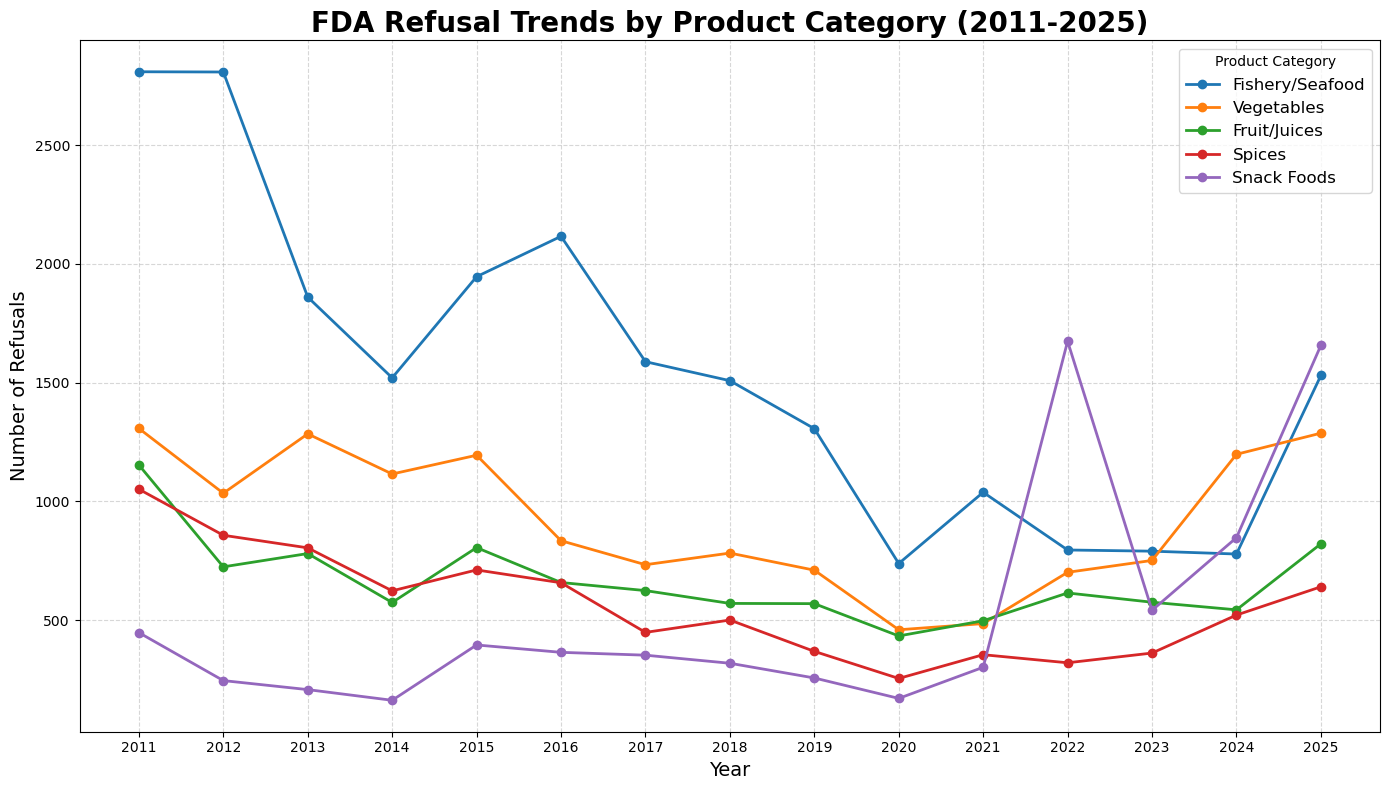

In [6]:
#Filter data for 2011-2025
df_year = df[(df['Year'] >= 2011) & (df['Year'] <= 2025)].copy()

#Identify Top 5 Categories for the multi-line chart
top_5_cats = df_year ['Product_category'].value_counts().head(5).index

#Plot
plt.figure(figsize=(14, 8))

#Loop through top categories to plot lines
for cat in top_5_cats:
    cat_data = df_year[df_year['Product_category'] == cat]['Year'].value_counts().sort_index()
    cat_data = cat_data.reindex(range(2011, 2026), fill_value=0)
    plt.plot(cat_data.index, cat_data.values, marker='o', label=cat, linewidth=2)

#Formatting
plt.title('FDA Refusal Trends by Product Category (2011-2025)', fontsize=20, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Refusals', fontsize=14)
plt.xticks(range(2011, 2026))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Product Category", fontsize=12)
#Display
plt.tight_layout()
plt.savefig('Refusals_Trend_2011_2025.png', dpi=300)
plt.show()

### 2. Geographic Origin Analysis  
**Objective:** To pinpoint specific trading partners with statistically higher rates of import refusal.  

**Key Insights:**  
* **Global Scope:** The dataset encompasses imports from **188 distinct countries**.  
* **Regional Focus:** Despite the global diversity, **Asian nations** dominate the top refusal rankings, suggesting a need for targeted supplier verification programs in that region.  

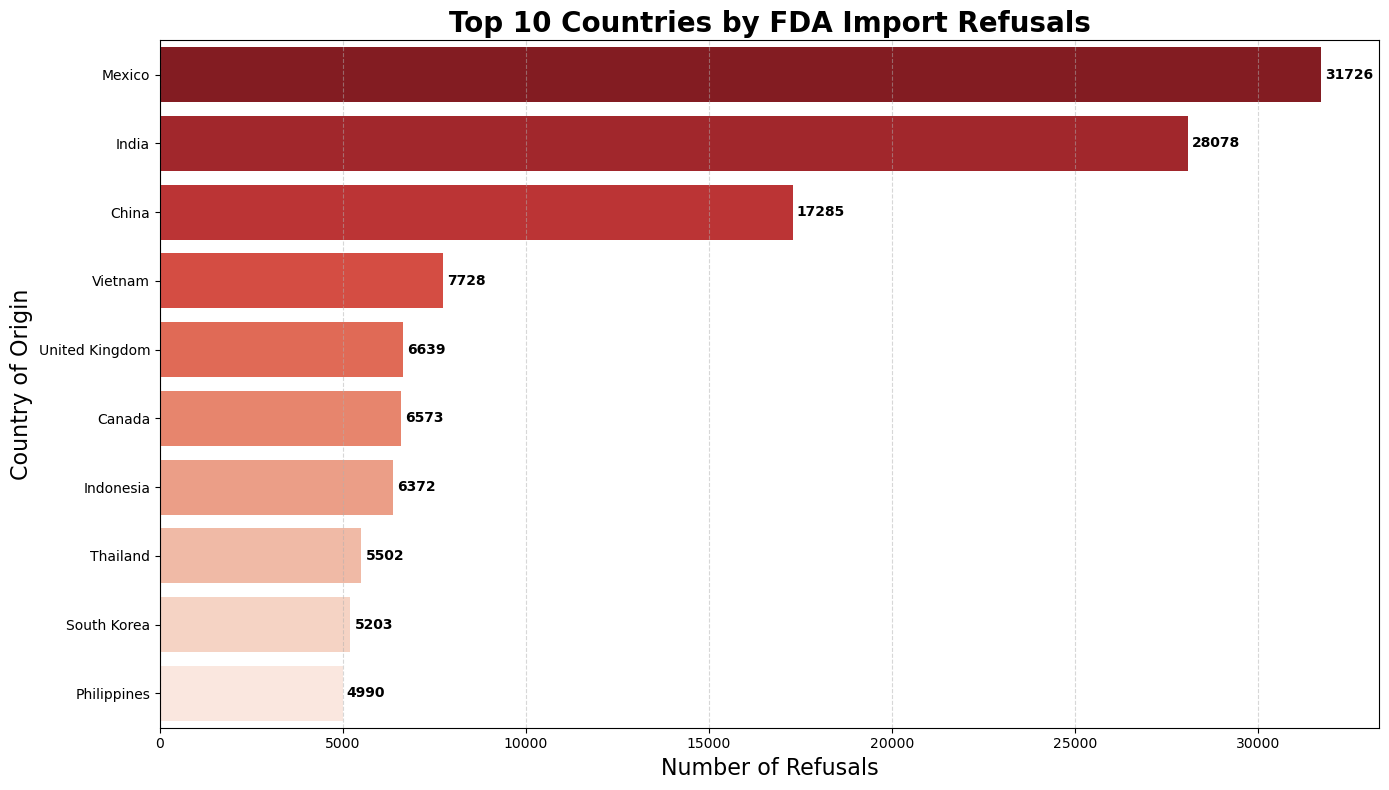

In [7]:
#Count Top 10 Countries
country_count = df['Country'].value_counts().head(10)

plt.figure(figsize=(14, 8))

ax = sns.barplot(
    x=country_count.values,
    y=country_count.index,
    hue=country_count.index,
    palette='Reds_r',
    legend=False
)

#Add labels
for container in ax.containers:
    ax.bar_label(container, padding=3, weight='bold')

plt.title('Top 10 Countries by FDA Import Refusals', fontsize=20, weight='bold')
plt.xlabel('Number of Refusals', fontsize=16) # Typo Fixed
plt.ylabel('Country of Origin', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Top_10_Countries_Refusals.png', dpi=300)
plt.show()

### 3. Product Vulnerability Assessment  
**Objective:** To classify refusals by commodity type using NLP-based categorization, revealing which food sectors face the most scrutiny.  

**Key Insights:**  
* **The Seafood Outlier:** Raw Fish & Seafood refusals are astronomically high compared to other categories, likely driven by rapid decomposition and histamine risks.  
* **The Meat Anomaly:** Raw Meat shows only ~260 refusals (3x less than Baby Food). This suggests either:  
    * A lower volume of raw meat imports compared to seafood.  
    * Pre-inspection clearance programs (like USDA equivalence) filtering out bad shipments before they reach FDA refusal stages.  

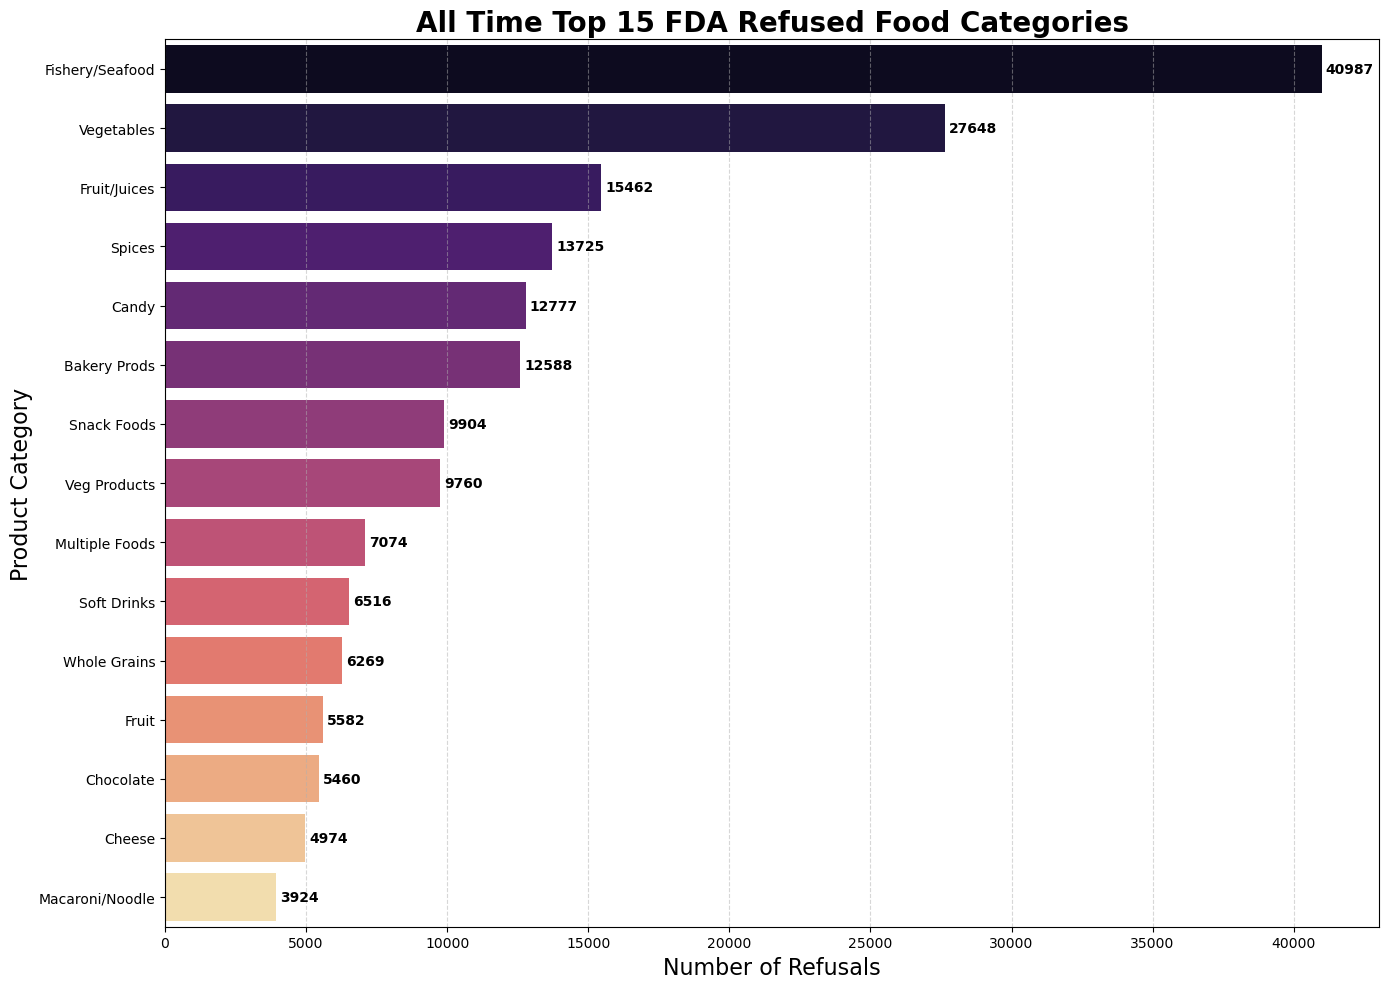

In [8]:
#Top 15 Product Categories
cat_count = df['Product_category'].value_counts().head(15)

plt.figure(figsize=(14, 10)) # Slightly taller for better readability

ax = sns.barplot(
    x=cat_count.values,
    y=cat_count.index,
    hue=cat_count.index,
    palette='magma',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, padding=3, weight='bold')

plt.title('All Time Top 15 FDA Refused Food Categories', fontsize=20, weight='bold')
plt.xlabel('Number of Refusals', fontsize=16)
plt.ylabel('Product Category', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Top_15_Food_Categories.png', dpi=300)
plt.show()

### 4. Root Cause Analysis (Violation Charges)  
**Objective:** To analyze the 5,500+ unique FDA violation allegations to determine the *nature* of the failures.  

**Key Insights:**  
* **#1 Filth:** The leading cause of refusal, primarily affecting Fish, Seafood, and Vegetables.  
* **#2 Nutrient Mislabeling:** A major administrative failure, predominantly affecting Snacks and Juices.  
* **#3 Unsafe Colors:** Unauthorized additives remain a top tier issue for processed snacks/drinks.  
* **#4 Salmonella:** A persistent biological hazard, tracking closely with the "Filth" category in raw agricultural products.  

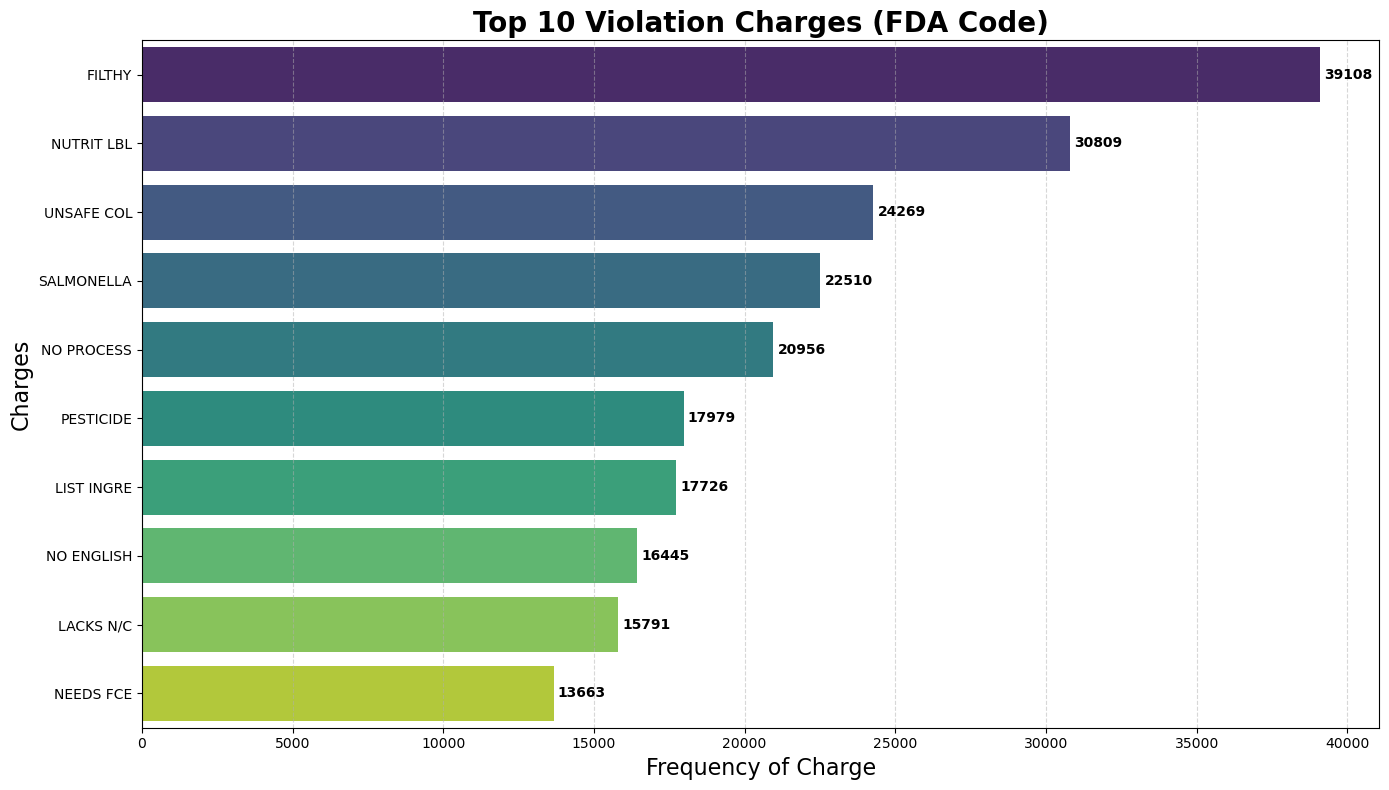

In [14]:
#PHASE 5: DECODING FDA REFUSAL CHARGES, Assisted by GEMINI Pro  ---

# 1. Load the Reference File (The Decoder)
ref_file_path = r"D:\data_files\FDA_Food_Safety_Project\ACT_SECTION_CHARGES.CSV"
ref_df = pd.read_csv(ref_file_path, encoding='ISO-8859-1')

# 2. Fix the "Weird Column Name" (BOM) issue
# The first column often imports with weird characters like 'ï»¿ASC_ID'
# This line renames the first column to 'Charge_ID' no matter what it was called
ref_df.rename(columns={ref_df.columns[0]: 'Charge_ID'}, inplace=True)

# 3. Create the Dictionary
# We map the ID (e.g., 324) to the Description (e.g., "NO ENGLISH")
# We convert to string to ensure matching works
ref_df['Charge_ID'] = ref_df['Charge_ID'].astype(str)
charge_map = dict(zip(ref_df['Charge_ID'], ref_df['CHRG_CODE']))

# 4. Process Main Data (Split & Explode)
# Some rows in main df have multiple charges "3600, 3846". We separate them.
# Drop rows with no charges first
charges_series = df.dropna(subset=['Refusal Charges'])['Refusal Charges']

# 1. Define a translation tool
# This takes a string like "3885, 205" and turns it into "Unsafe Color, Filthy"
def translate_charges(charge_string):
    if pd.isna(charge_string): 
        return "No Charge Listed"
    
    # Split the numbers apart
    codes = str(charge_string).split(',') 
    
    # Look up each number in your dictionary
    descriptions = [charge_map.get(code.strip(), "Unknown Code") for code in codes]
    
    # Join them back together with commas
    return ", ".join(descriptions)

# 2. Apply it to create the new column
df['Reason'] = df['Refusal Charges'].apply(translate_charges)


# Split by comma and flatten the list (Explode)
all_charges = charges_series.astype(str).str.split(',').explode().str.strip()

# 5. Apply the Decoder Ring
# Map the numbers to names using the dictionary we created in step 3
decoded_reasons = all_charges.map(charge_map)


# Fill unknown codes (in case some aren't in the reference file)
decoded_reasons = decoded_reasons.fillna("Unknown Code")


# 6. Visualize the Top 10 Reasons
top_charges = decoded_reasons.value_counts().head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=top_charges.values,
    y=top_charges.index,
    palette='viridis',
    hue=top_charges.index,
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, padding=3, weight='bold')

plt.title('Top 10 Violation Charges (FDA Code)', fontsize=20, weight='bold')
plt.xlabel('Frequency of Charge', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Top_10_Charges.png', dpi=300)
plt.show()
